In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['C:\\Users\\ziyig\\Desktop\\EE 258\\Project 1\\seg_train', 'C:\\Users\\ziyig\\Desktop\\EE 258\\Project 1\\seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|                                                                                         | 0/2191 [00:00<?, ?it/s]

Loading C:\Users\ziyig\Desktop\EE 258\Project 1\seg_train


  3%|██▌                                                                              | 14/437 [00:00<00:06, 64.39it/s]

Loading C:\Users\ziyig\Desktop\EE 258\Project 1\seg_test


100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1709.48it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
print('train_images', type(train_images), train_images.shape)

train_images <class 'numpy.ndarray'> (14034, 150, 150, 3)


In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


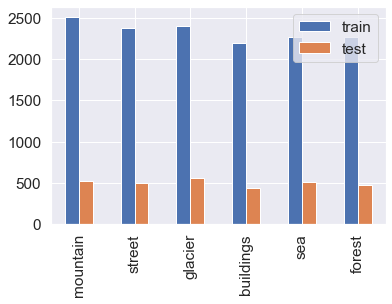

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

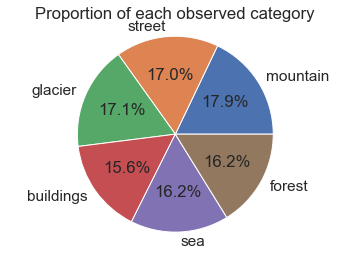

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [10]:
#Good practice: scale the data
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [11]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

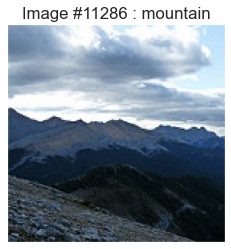

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

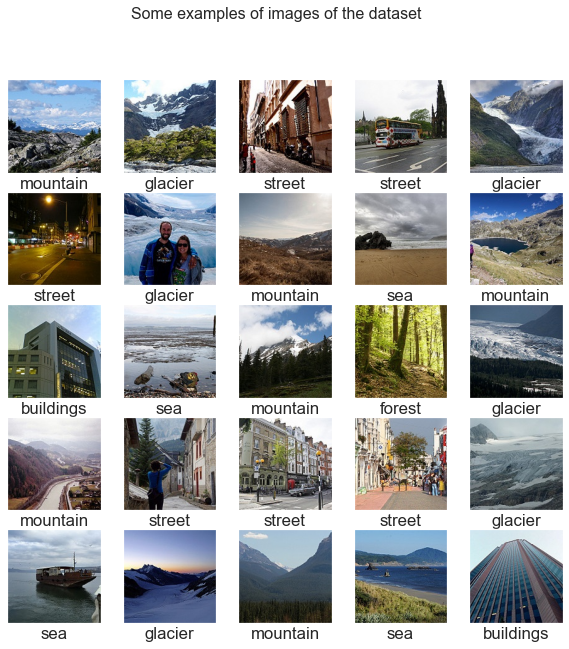

In [14]:
display_examples(class_names, train_images, train_labels)

In [15]:
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[150, 150,3]))
model.add(keras.layers.Dense(300, activation="relu", activity_regularizer=l1(0.0001)))
model.add(keras.layers.Dense(300, activation="relu", use_bias=True, activity_regularizer=l1(0.0001)))
model.add(keras.layers.Dense(300, activation="relu", use_bias=False, activity_regularizer=l1(0.0001)))
model.add(keras.layers.Dense(300, activation="relu", use_bias=True, activity_regularizer=l1(0.0001)))
model.add(keras.layers.Dense(300, activation="relu", use_bias=True, activity_regularizer=l1(0.0001)))
model.add(keras.layers.Dense(10, activation="softmax"))

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [17]:
history = model.fit(train_images, train_labels, batch_size=50, epochs=20, validation_split = 0.2)

Epoch 1/20
225/225 [==============================] - 4s 17ms/step - loss: 1.6481 - accuracy: 0.3694 - val_loss: 1.5373 - val_accuracy: 0.4154
Epoch 2/20
225/225 [==============================] - 3s 14ms/step - loss: 1.3925 - accuracy: 0.4795 - val_loss: 1.3676 - val_accuracy: 0.4849
Epoch 3/20
225/225 [==============================] - 3s 14ms/step - loss: 1.3084 - accuracy: 0.5142 - val_loss: 1.2593 - val_accuracy: 0.5319
Epoch 4/20
225/225 [==============================] - 3s 14ms/step - loss: 1.2397 - accuracy: 0.5455 - val_loss: 1.2480 - val_accuracy: 0.5208
Epoch 5/20
225/225 [==============================] - 3s 14ms/step - loss: 1.2060 - accuracy: 0.5626 - val_loss: 1.3909 - val_accuracy: 0.4685
Epoch 6/20
225/225 [==============================] - 3s 14ms/step - loss: 1.1640 - accuracy: 0.5742 - val_loss: 1.2615 - val_accuracy: 0.5383
Epoch 7/20
225/225 [==============================] - 3s 14ms/step - loss: 1.1383 - accuracy: 0.5842 - val_loss: 1.2488 - val_accuracy: 0.5511

In [18]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

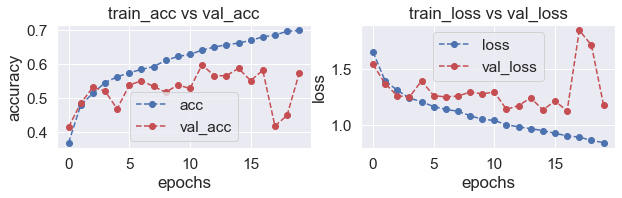

In [19]:
plot_accuracy_loss(history)

In [20]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 1s 8ms/step - loss: 1.2252 - accuracy: 0.5553


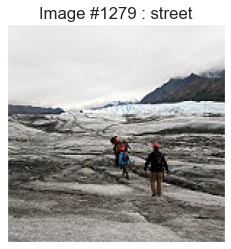

In [21]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [22]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

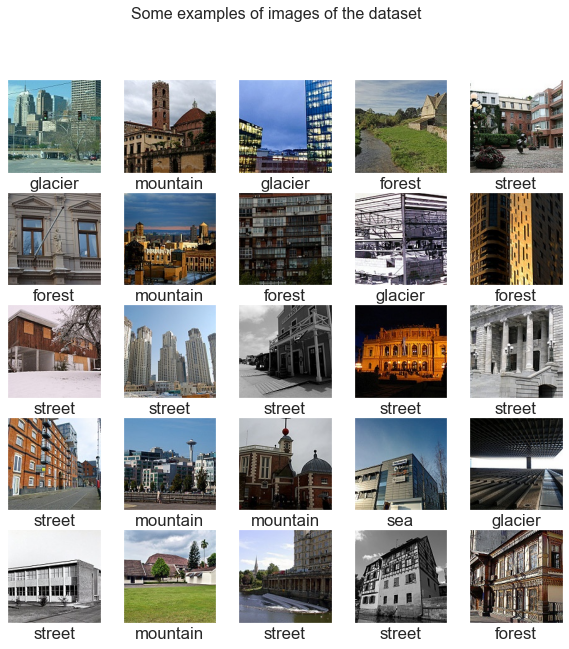

In [23]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)